<a href="https://colab.research.google.com/github/minkyeongk/DL_TensorFlow_Developer/blob/main/3.%20Natural%20Language%20Processing%20in%20TensorFlow/week_3/week_3_notebook_1b_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple layer LSTM

LSTM은 문맥을 유지시키기 위해 사용된다

패러미터 굉장히 많아서 트레이닝 시간 오래 걸린다

따로 Flatten layer 필요하지 않다 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteT854IN/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteT854IN/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteT854IN/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
# train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes) # 코드 실행 시 없는 속성이라고 에러 발생 
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, 64),    # 임베딩 > 단어의 의미 파악, 벡터로 나타냄
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # 양방향 cell state를 가지는 LSTM 적용, 다른 LSTM에 feed 해줘야 하기 떄문에 리컨 시퀀스를 트루로, 앞 인자는 num of output   
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),    # 값을 반으로 줄여줬네 
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epoch = 10
history = model.fit(train_dataset, epochs=num_epoch, validation_data=test_dataset)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 339s 837ms/step - loss: 0.6509 - accuracy: 0.5953 - val_loss: 

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

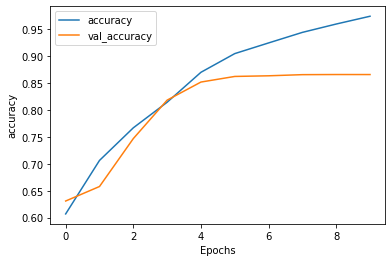

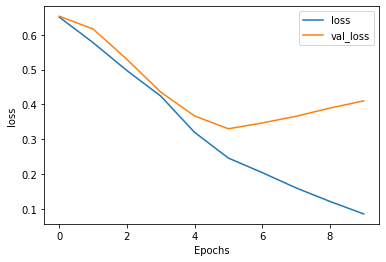

In [8]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# 정확도 97~8, 오버피팅 발생 